# IEEE-CIS fraud detection 

## 데이터 불러오기 

In [1]:
#불러오고 보자.. 
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


** 순서 ! **

2. 데이터 전처리 : feature, target 분리 

```python
features = train_transaction.iloc[:, 2:]
target = train_transaction.iloc[:, 1]
```


In [2]:
train_identity = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/train_identity.csv')
train_transaction = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/train_transaction.csv')
test_transaction = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_transaction.csv')

pd.set_option('display.max_columns', None)
train_transaction.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

In [3]:
train_transaction.iloc[:, 0].name

'TransactionID'

<AxesSubplot:xlabel='isFraud'>

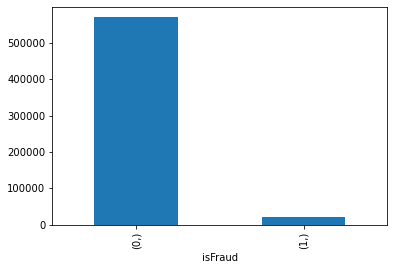

In [4]:
# is fraud 의 비율 : 3.6%
ax = train_transaction[['isFraud']].value_counts()
ax.plot.bar()

In [5]:
pd.set_option('display.max_columns', None)
train_identity.head(5).sort_values('TransactionID')

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  id_17  id_18  \
0    NaN    NaN  100.0  NotFound    NaN -480.0    New  NotFound  166.0    NaN   
1    NaN    NaN  100.0  NotFound   49.0 -300.0    New  NotFound  166.0    NaN   
2    0.0    0.0  100.0  NotFound   52.0    NaN  Found     Found  121.0    NaN   
3    NaN    NaN  100.0  NotFound   52.0    NaN    New  NotFound  225.0    NaN   
4    0.0    0.0  100.0  NotFound    NaN -300.0  Found     Found  166.0   15.0   

   id_19  id_20  id_21  id_22 id_23  id_24  id_25  id_26 id_27  id_28  \
0  542.0  144.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
1  621.0  500.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
2  410.0  142.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   
3  176.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN    New   
4  529.0  575.0    NaN    NaN   NaN    NaN    NaN    NaN   NaN  Found   

      id_29             id_30                id_31  id_32      id_33  \
0  NotFound       Android 7.0  samsung browser 6.2   32.0  2220x1080   
1  NotFound        iOS 11.1.2   mobile safari 11.0   32.0   1334x750   
2     Found               NaN          chrome 62.0    NaN        NaN   
3  NotFound               NaN          chrome 62.0    NaN        NaN   
4     Found  Mac OS X 10_11_6          chrome 62.0   24.0   1280x800   

            id_34 id_35 id_36 id_37 id_38 DeviceType  \
0  match_status:2     T     F     T     T     mobile   
1  match_status:1     T     F     F     T     mobile   
2             NaN     F     F     T     T    desktop   
3             NaN     F     F     T     T    desktop   
4  match_status:2     T     F     T     T    desktop   

                      DeviceInfo  
0  SAMSUNG SM-G892A Build/NRD90M  
1                     iOS Device  
2                        Windows  
3                            NaN  
4                          MacOS

In [6]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

### Column 선정

#### C-columns

In [7]:
train_transaction[[f'C{i}' for i in range(1,15) ]].nunique()

C1     1657
C2     1216
C3       27
C4     1260
C5      319
C6     1328
C7     1103
C8     1253
C9      205
C10    1231
C11    1476
C12    1199
C13    1597
C14    1108
dtype: int64

In [8]:
sorted(train_transaction['C3'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0]

C value 컬럼 특징
- 결측치 없음
- C3 의 nunique : 27 ( 0 ~ 26)
- 

In [9]:
#Alphabet - value 들간 상관계수가 심상치 않아보인다 - 상관계수가 높은 것들은 제거 가능 
c_column_df = train_transaction[[f'C{i}' for i in range(1,15) ]]
C_corr = c_column_df.corr()
C_corr

C1        C2        C3        C4        C5        C6        C7  \
C1   1.000000  0.995089 -0.003467  0.967800  0.165862  0.982238  0.926258   
C2   0.995089  1.000000 -0.003339  0.972134  0.126540  0.974845  0.938867   
C3  -0.003467 -0.003339  1.000000 -0.001720 -0.008101 -0.004711 -0.001730   
C4   0.967800  0.972134 -0.001720  1.000000 -0.012842  0.962319  0.895092   
C5   0.165862  0.126540 -0.008101 -0.012842  1.000000  0.232409 -0.009970   
C6   0.982238  0.974845 -0.004711  0.962319  0.232409  1.000000  0.858583   
C7   0.926258  0.938867 -0.001730  0.895092 -0.009970  0.858583  1.000000   
C8   0.967746  0.975863 -0.001203  0.959995 -0.011654  0.921972  0.982983   
C9   0.175999  0.133566 -0.010074 -0.015970  0.925786  0.250695 -0.012399   
C10  0.958202  0.970624 -0.001494  0.952466 -0.011846  0.914440  0.985062   
C11  0.996515  0.993898 -0.003583  0.974547  0.168862  0.991105  0.915209   
C12  0.927939  0.940258 -0.001763  0.894619 -0.009875  0.858182  0.999489   
C13  0.774603  0.751221 -0.007747  0.644549  0.717509  0.808531  0.632394   
C14  0.951761  0.936148 -0.005091  0.907676  0.378950  0.984201  0.794701   

           C8        C9       C10       C11       C12       C13       C14  
C1   0.967746  0.175999  0.958202  0.996515  0.927939  0.774603  0.951761  
C2   0.975863  0.133566  0.970624  0.993898  0.940258  0.751221  0.936148  
C3  -0.001203 -0.010074 -0.001494 -0.003583 -0.001763 -0.007747 -0.005091  
C4   0.959995 -0.015970  0.952466  0.974547  0.894619  0.644549  0.907676  
C5  -0.011654  0.925786 -0.011846  0.168862 -0.009875  0.717509  0.378950  
C6   0.921972  0.250695  0.914440  0.991105  0.858182  0.808531  0.984201  
C7   0.982983 -0.012399  0.985062  0.915209  0.999489  0.632394  0.794701  
C8   1.000000 -0.014492  0.996970  0.962722  0.983027  0.653245  0.860246  
C9  -0.014492  1.000000 -0.014731  0.182446 -0.012212  0.704056  0.397396  
C10  0.996970 -0.014731  1.000000  0.956056  0.983817  0.653941  0.853009  
C11  0.962722  0.182446  0.956056  1.000000  0.915693  0.779286  0.962465  
C12  0.983027 -0.012212  0.983817  0.915693  1.000000  0.631704  0.793936  
C13  0.653245  0.704056  0.653941  0.779286  0.631704  1.000000  0.880722  
C14  0.860246  0.397396  0.853009  0.962465  0.793936  0.880722  1.000000

In [10]:
c_column_df.describe()

C1             C2             C3             C4  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean       14.092458      15.269734       0.005644       4.092185   
std       133.569018     154.668899       0.150536      68.848459   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         3.000000       3.000000       0.000000       0.000000   
max      4685.000000    5691.000000      26.000000    2253.000000   

                  C5             C6             C7             C8  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        5.571526       9.071082       2.848478       5.144574   
std        25.786976      71.508467      61.727304      95.378574   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         1.000000       2.000000       0.000000       0.000000   
max       349.000000    2253.000000    2255.000000    3331.000000   

                  C9            C10            C11            C12  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        4.480240       5.240343      10.241521       4.076227   
std        16.674897      95.581443      94.336292      86.666218   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         2.000000       0.000000       2.000000       0.000000   
max       210.000000    3257.000000    3188.000000    3188.000000   

                 C13            C14  
count  590540.000000  590540.000000  
mean       32.539918       8.295215  
std       129.364844      49.544262  
min         0.000000       0.000000  
25%         1.000000       1.000000  
50%         3.000000       1.000000  
75%        12.000000       2.000000  
max      2918.000000    1429.000000

points - 
평균, 4분위수들은 엄청 작은데 max 값은 엄청 큼.. 이상치는 아닐까? 

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


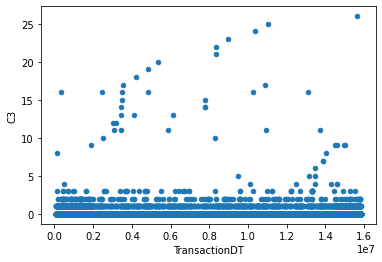

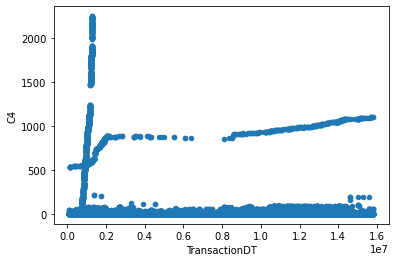

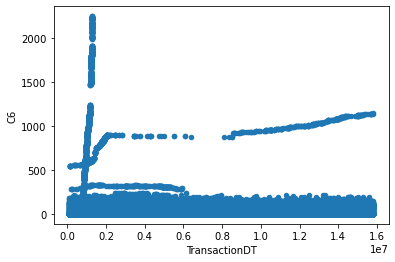

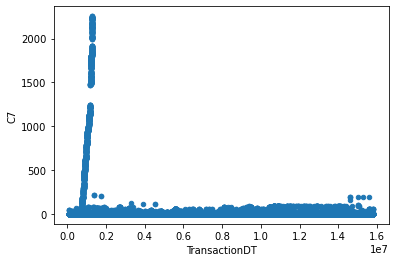

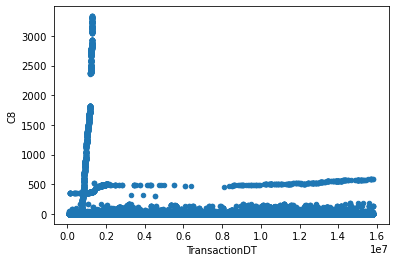

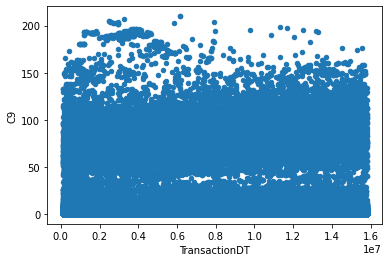

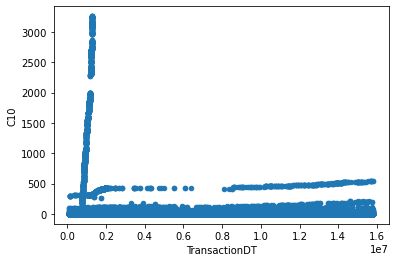

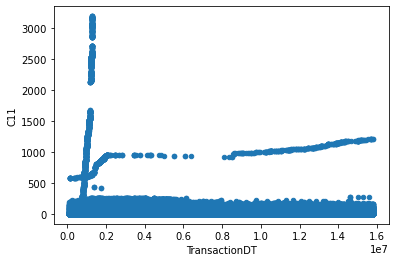

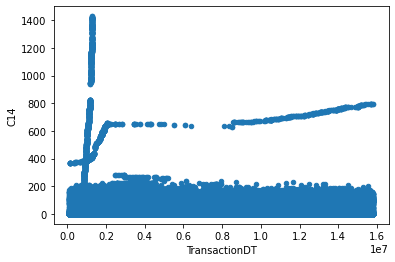

In [11]:
#컬럼 별 분포 확인
for i in range(1, 15):
    figures = train_transaction.plot( 'TransactionDT', f'C{i}',"scatter")
    
    print(figures)

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


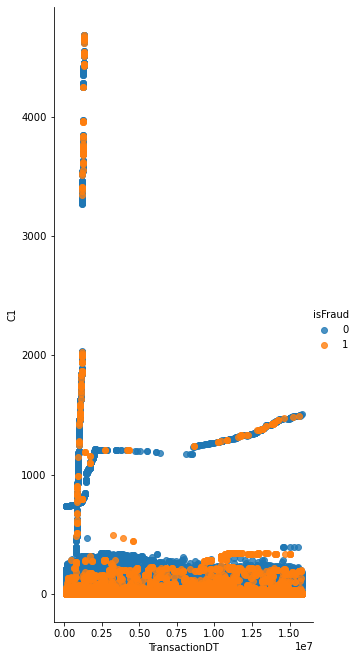

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


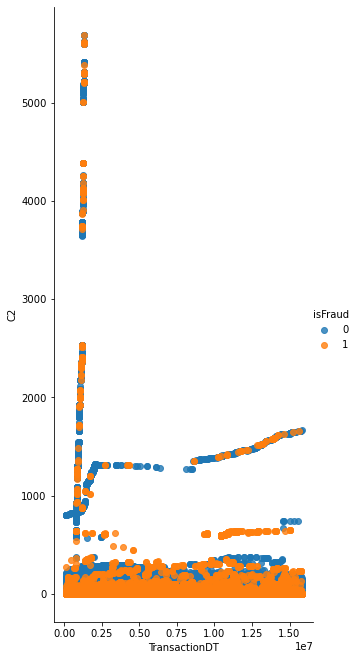

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


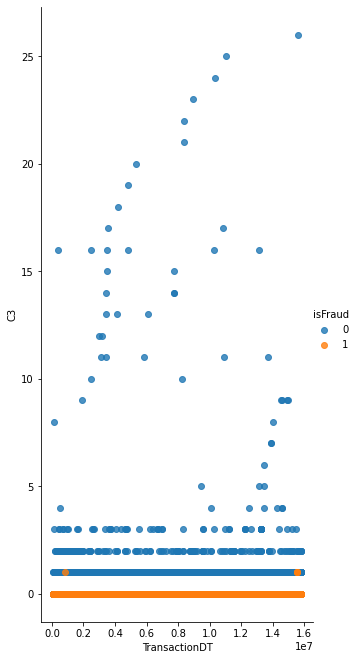

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


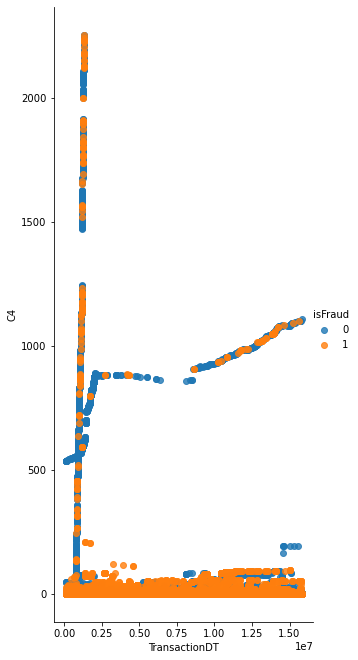

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


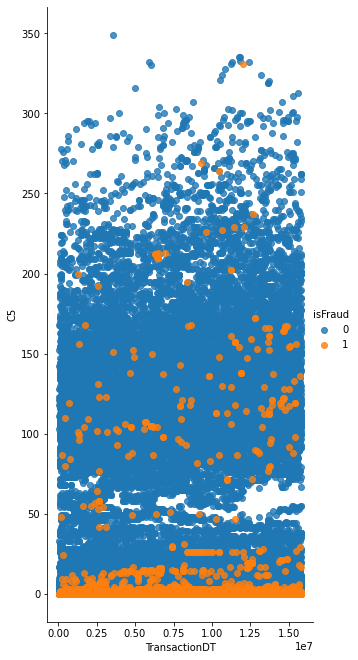

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


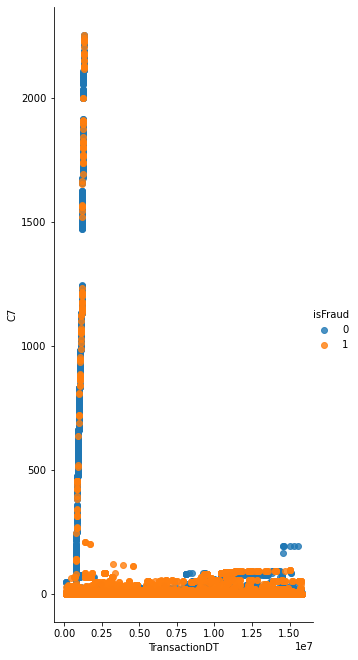

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


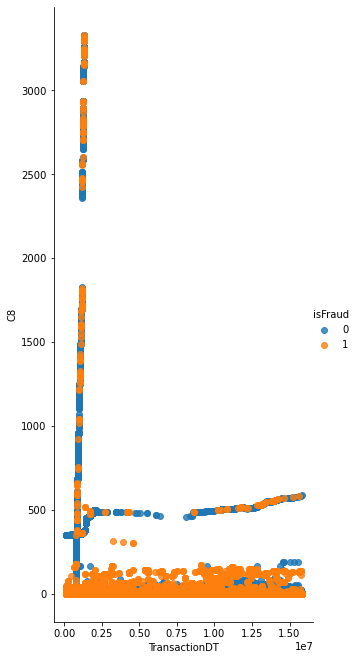

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


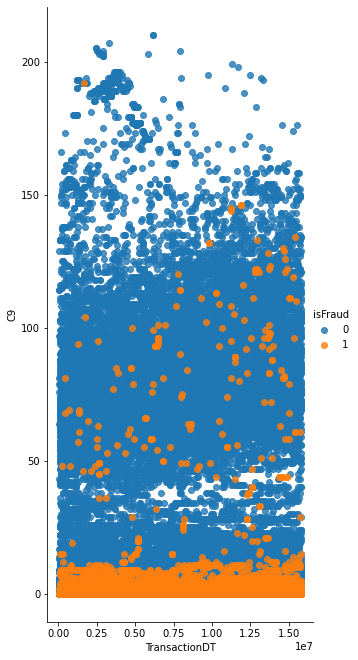

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


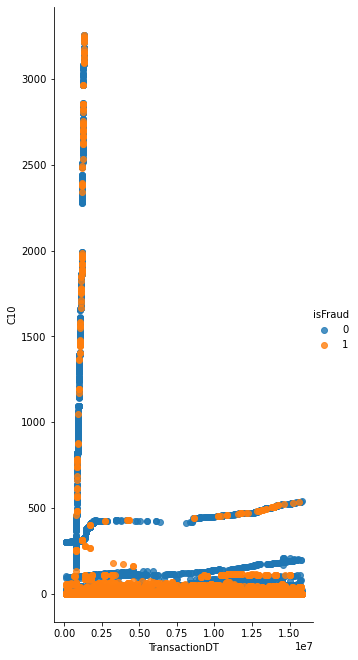

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


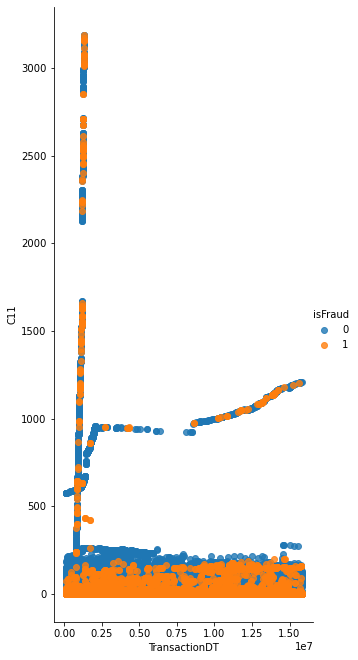

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


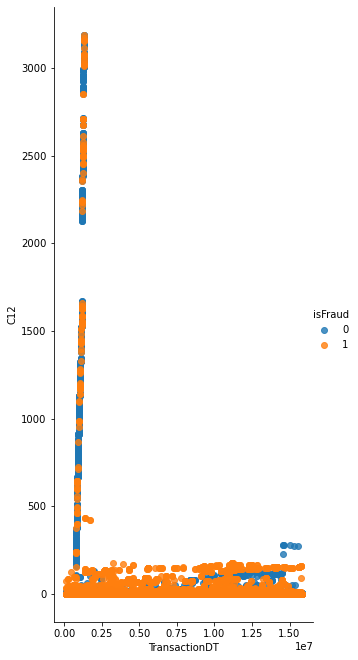

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


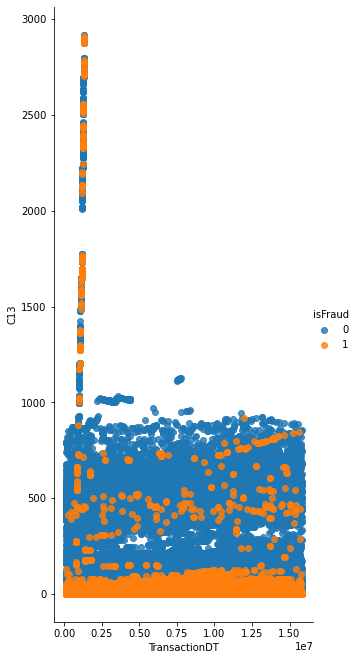

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


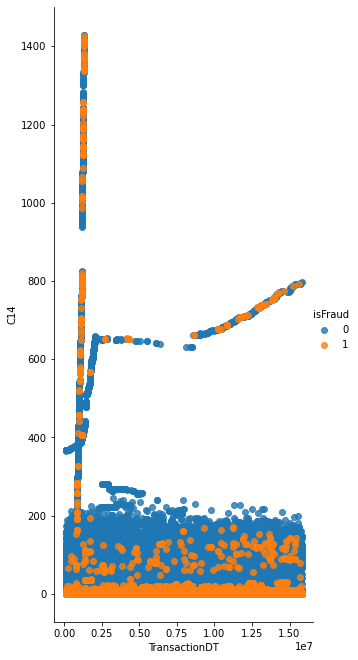

In [12]:
#graph trial - 결제 시각 & C-columns, 
for i in range(1, 15):
    sns.lmplot('TransactionDT', f'C{i}', train_transaction, hue='isFraud', fit_reg=False)
    fig = plt.gcf()
    fig.set_size_inches(5, 10)
    plt.show()

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


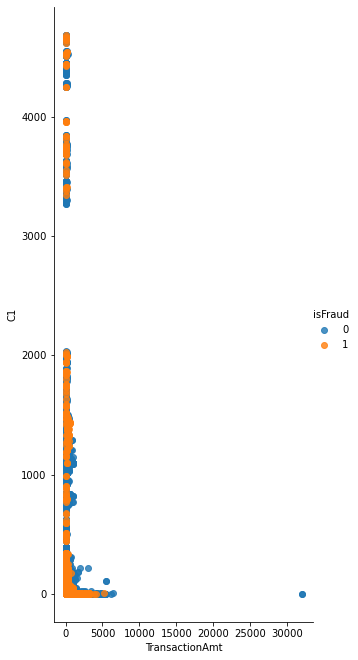

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


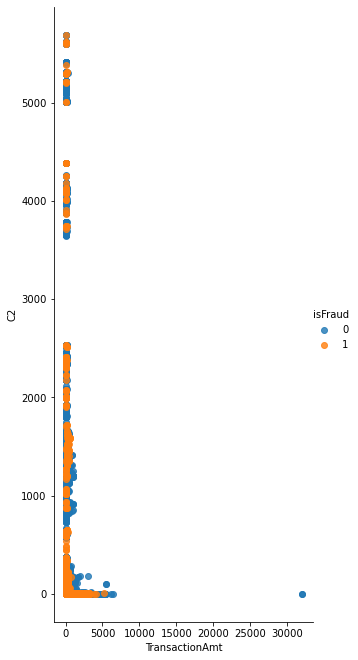

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


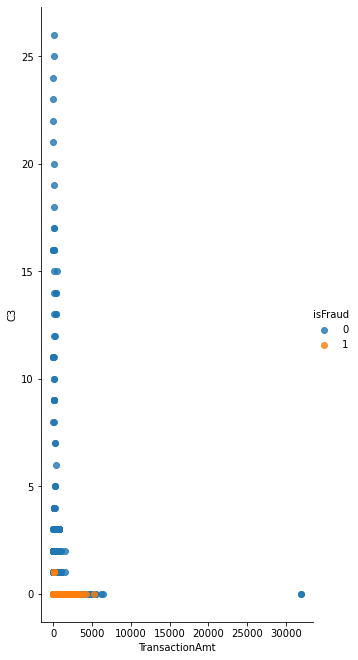

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


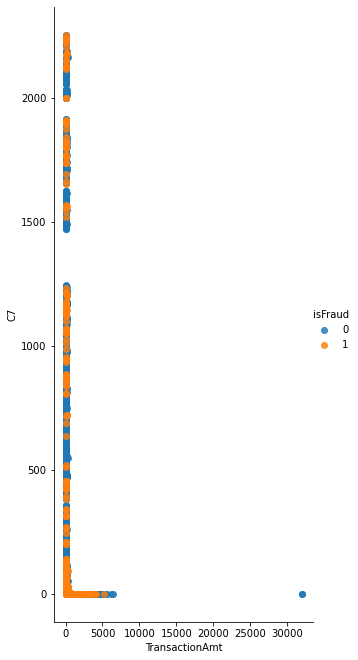

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


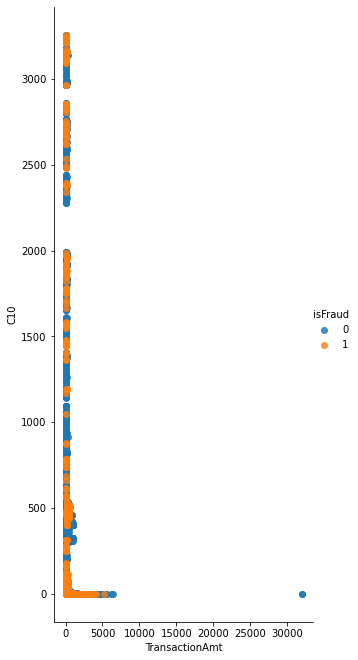

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


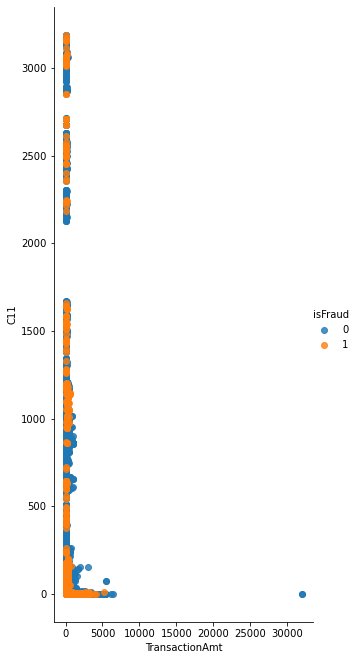

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


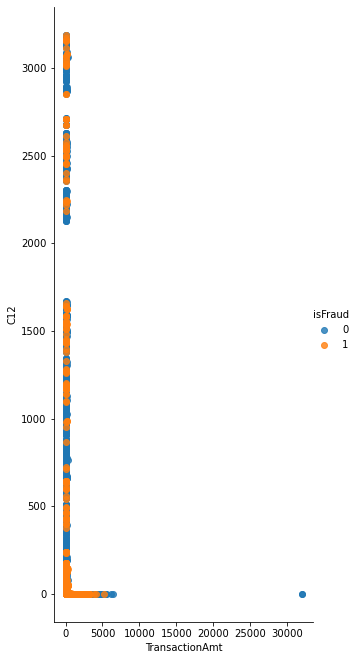

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


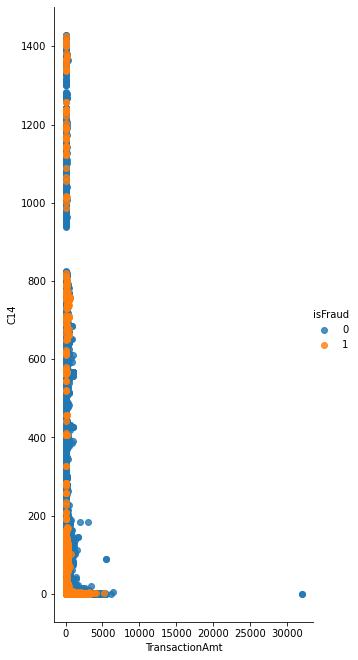

In [13]:
#graph trial - 결제 금액 & C-columns, 
for i in range(1, 15):
    sns.lmplot('TransactionAmt', f'C{i}', train_transaction, hue='isFraud', fit_reg=False)
    fig = plt.gcf()
    fig.set_size_inches(5, 10)
    plt.show()

In [14]:
#graph trial - card colum & C-columns ?? 
card4_encoding = pd.get_dummies(train_transaction, columns = ['card4'])
card4_encoding

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3  card5   card6  addr1  addr2  dist1  dist2  \
0       13926    NaN  150.0  142.0  credit  315.0   87.0   19.0    NaN   
1        2755  404.0  150.0  102.0  credit  325.0   87.0    NaN    NaN   
2        4663  490.0  150.0  166.0   debit  330.0   87.0  287.0    NaN   
3       18132  567.0  150.0  117.0   debit  476.0   87.0    NaN    NaN   
4        4497  514.0  150.0  102.0  credit  420.0   87.0    NaN    NaN   
...       ...    ...    ...    ...     ...    ...    ...    ...    ...   
590535   6550    NaN  150.0  226.0   debit  272.0   87.0   48.0    NaN   
590536  10444  225.0  150.0  224.0   debit  204.0   87.0    NaN    NaN   
590537  12037  595.0  150.0  224.0   debit  231.0   87.0    NaN    NaN   
590538   7826  481.0  150.0  224.0   debit  387.0   87.0    3.0    NaN   
590539  15066  170.0  150.0  102.0  credit  299.0   87.0    NaN    NaN   

       P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8  \
0                NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
1          gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
2        outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
3          yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0   
4          gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0   
...              ...           ...  ...  ...  ...  ...  ...  ...  ...  ...   
590535           NaN           NaN  2.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
590536     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
590537     gmail.com           NaN  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
590538       aol.com           NaN  1.0  1.0  0.0  0.0  0.0  3.0  0.0  0.0   
590539     gmail.com           NaN  2.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   

         C9  C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  \
0       1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN   
1       0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN   
2       1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN   
3       1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN   
4       0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN   
...     ...  ...  ...  ...   ...  ...    ...    ...   ...   ...  ...  ..  ..   
590535  2.0  0.0  1.0  0.0   3.0  2.0   29.0   29.0  30.0   NaN  NaN NaN NaN   
590536  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN   
590537  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN   
590538  2.0  0.0  1.0  1.0   5.0  1.0   22.0   22.0   0.0  22.0  0.0 NaN NaN   
590539  2.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   0.0   1.0  0.0 NaN NaN   

        D8  D9   D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5  \
0      NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F   
1      NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T   
2      NaN NaN   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F   
3      N

/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

<Figure size 432x288 with 0 Axes>

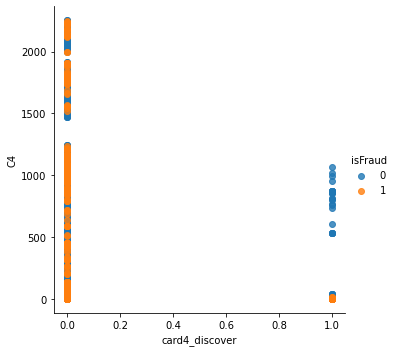

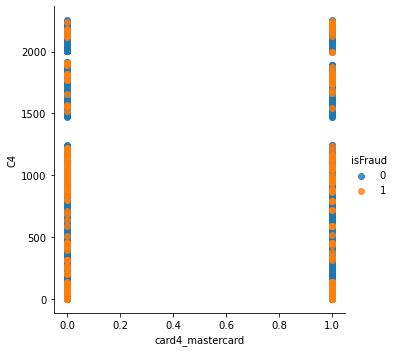

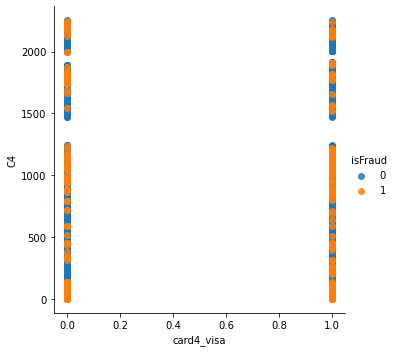

In [15]:
plt.figure()

sns.lmplot('card4_american express', 'C4', card4_encoding, hue='isFraud', fit_reg=False)
sns.lmplot('card4_discover', 'C4', card4_encoding, hue='isFraud', fit_reg=False)
sns.lmplot('card4_mastercard', 'C4', card4_encoding, hue='isFraud', fit_reg=False)
sns.lmplot('card4_visa', 'C4', card4_encoding, hue='isFraud', fit_reg=False)

fig.set_size_inches(5, 10)
plt.show()

<AxesSubplot:>

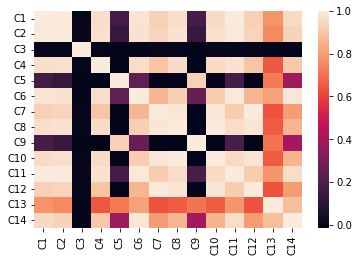

In [16]:
sns.heatmap(C_corr)

In [17]:
#VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_table = pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(c_column_df.values, idx) for idx in range(c_column_df.shape[1])],
    "features": c_column_df.columns,
})
VIF_table= VIF_table.sort_values('VIF Factor', ascending = False)
VIF_table

VIF Factor features
11  4195.722689      C12
6   2953.148577       C7
10  2313.900499      C11
7   1614.232379       C8
3    856.079141       C4
5    650.245064       C6
9    530.471117      C10
0    513.258502       C1
13   368.179637      C14
1    347.255671       C2
8     69.359449       C9
12    41.240021      C13
4     15.059040       C5
2      1.000764       C3

##### discussion of this block
사용할 feature / reason
- C2, C5, C13 : VIF 가 가장 낮은 하위 3개 column 
- C3, C5, C9 : TransactionDT, TransactionAmt 분포에서 isFraud 0 과 1 데이터의 분포가 다름 (그래프 참고)

2, 3, 5, 9, 13

In [18]:
list(VIF_table.index)

[11, 6, 10, 7, 3, 5, 9, 0, 13, 1, 8, 12, 4, 2]

In [19]:
#다중공선성 상위 컬럼 제거 
VIF_list= list(VIF_table.index+1)
for i in VIF_list:
    c_column_df_try = c_column_df.drop(columns = f'C{i}')
    print(f'VIF without C{i} column')
    print('---------------')
    print(pd.DataFrame({
        "VIF Factor": [variance_inflation_factor(c_column_df_try.values, idx) for idx in range(c_column_df_try.shape[1])],
        "features": c_column_df_try.columns,
    }))

VIF without C12 column
---------------
     VIF Factor features
0    510.640419       C1
1    312.304149       C2
2      1.000599       C3
3    666.886306       C4
4     15.051982       C5
5    536.338087       C6
6    392.492650       C7
7   1387.978424       C8
8     65.161266       C9
9    497.780420      C10
10  1717.746324      C11
11    40.025995      C13
12   347.443902      C14
VIF without C7 column
---------------
     VIF Factor features
0    509.911322       C1
1    330.061542       C2
2      1.000721       C3
3    778.682019       C4
4     15.027447       C5
5    546.190837       C6
6   1583.154129       C8
7     64.985378       C9
8    467.787098      C10
9   1755.849240      C11
10   557.638830      C12
11    39.726697      C13
12   353.374299      C14
VIF without C11 column
---------------
     VIF Factor features
0    503.370193       C1
1    335.200435       C2
2      1.000719       C3
3    752.765716       C4
4     15.016072       C5
5    387.401109       C6
6   2240.

In [20]:
c_column_df_2[['isFraud']] = train_transaction[['isFraud']]

c_column_df_2

NameError: name 'c_column_df_2' is not defined

In [ ]:
#많이 낮아졌지만, 아직 좀 큰가 싶으니 scatter 로 한 번 더 확인
plt.scatter(c_column_df_2["C2"], c_column_df_2["isFraud"], label="C2")
#plt.scatter(c_column_df_2["C3"], c_column_df_2["isFraud"], label="C3")
#plt.scatter(c_column_df_2["C5"], c_column_df_2["isFraud"], label="C5")
#plt.scatter(c_column_df_2["C9"], c_column_df_2["isFraud"], label="C9")
plt.scatter(c_column_df_2["C13"], c_column_df_2["isFraud"], label="C13")
plt.legend()
plt.show()

In [ ]:
#target_mean해봤는데 c4에서 discover만 상대적으로 높은뎅 사용해봐도 괜찮을까용? from 세이 

In [ ]:
#PCA 함수
def apply_PCA(X, show_plot):
    from sklearn.decomposition import PCA
    # training data와 test data를 모두 PCA를 이용하여 차원 감소를 수행합니다.
    pca = PCA(n_components=0.90) # 원래 데이터의 90%를 보존하는 차원.
    pca_090 = pca.fit(X) # 학습 및 변환
    reduced_X = pca_090.transform(X)
    print(reduced_X.shape)
    
    if show_plot:
        labels = [f"PC{x}" for x in range(1, reduced_X.shape[1]+1)]
        pca_090_variance = np.round(pca_090.explained_variance_ratio_.cumsum()*100, decimals=1)
        plt.figure(figsize=(25,5))
        plt.bar(x=range(1, len(pca_090_variance)+1), height=pca_090_variance, tick_label=labels)

        plt.xticks(rotation=90, color='indigo', size=15)
        plt.yticks(rotation=0, color='indigo', size=15)
        plt.title('Scree Plot',color='tab:orange', fontsize=25)
        plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
        plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
        plt.show()
        
        X_train_pca_df = pd.DataFrame(reduced_X, columns=labels)
        display(X_train_pca_df)

    return pca_090, X_train_pca_df

In [ ]:
#scaling
c_column_df.describe()

In [ ]:
apply_PCA(c_column_df, True)

#### 전처리 1 

In [ ]:
#column drop 
tr_trans_pp =train_transaction.drop(columns = ['C1', 'C6',  'C7',  'C8','C10', 'C11', 'C12', 'C14'])
tr_trans_pp.head()

#### D-columns

In [ ]:
#D_corr
d_column_df = train_transaction[[f'D{i}' for i in range(1,16) ]]
d_corr = d_column_df.corr()
d_corr

In [ ]:
sns.heatmap(d_corr)

In [ ]:
#isFraud 컬럼 추가 
d_column_df['isFraud'] = train_transaction['isFraud']
d_column_df.info(20)

In [ ]:
#각 컬럼별 scale 보기  - 결측치는 중간값으로 
d_column_df.describe()

D column info 

D9 column info : min 0.0 , max 0.9583330154418944 -> <b> 0과 1 사이에 스케일링된 값? </b><br>

In [ ]:
#graph trial - DT & D columns
for i in range(1, 16):
    sns.lmplot(f'D{i}','TransactionDT',  train_transaction, hue='isFraud', fit_reg=False)
    fig = plt.gcf()
    fig.set_size_inches(5, 10)
    plt.show()

D4, D6, D10, D13, D15 : 1차함수로 isfraud  구별 가능 

In [ ]:
#graph trial - 결제 금액 & D columns
for i in range(1, 16):
    sns.lmplot(f'D{i}','TransactionAmt',  train_transaction, hue='isFraud', fit_reg=False)
    fig = plt.gcf()
    fig.set_size_inches(5, 10)
    plt.show()

In [ ]:
#결측치 중간값으로 채워줌 
d_column_df_nona = d_column_df.fillna(d_column_df.median())


In [91]:
#다중공선성 확인 - 결측치 중간값으로 채운 값 
pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(d_column_df_nona.values, idx) for idx in range(d_column_df_nona.shape[1])],
    "features": d_column_df_nona.columns,
})

VIF Factor features
0    11.710104       D1
1    13.939404       D2
2     1.558233       D3
3     3.067211       D4
4     1.810886       D5
5     2.887898       D6
6     1.796151       D7
7     1.403199       D8
8     3.468320       D9
9     3.123414      D10
10    2.602495      D11
11    2.394945      D12
12    1.223002      D13
13    1.081539      D14
14    5.133086      D15
15    1.042426  isFraud

##### discussion of this block
사용할 feature / reason
- D1 :    
하지만 분포가 0~50에 몰려있어 scaling 필요해보임 
- D9 : column 들 중 가장 연관성 적음 하지만 결측치 처리 필요! 

D4, D6, D10, D13, D15 : DT scatter plot 을 볼 때 선형 분류 가능

제거할 feature / reason
- D2: D1와 correlation 이 가장 높고, D1에 비해 다른 컬럼들과의 corr도 높음, highest VIF factor  

In [92]:
#고른 컬럼들 다중공선성 재확인

d_column_df_2 = d_column_df_nona[['D1', 'D4', 'D6', 'D9','D10', 'D13', 'D15']]

pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(d_column_df_2.values, idx) for idx in range(d_column_df_2.shape[1])],
    "features": d_column_df_2.columns,
})

# 1, 4, 6, 9는 많이 줄어든 반면 10, 13, 15는 아직 좀 높음..! 

VIF Factor features
0    2.421073       D1
1    2.590613       D4
2    1.199285       D6
3    1.639919       D9
4    3.034076      D10
5    1.145919      D13
6    4.497921      D15

#### 전처리 2

In [93]:
#column drop 
tr_trans_pp =tr_trans_pp.drop(columns = ['D1', 'D4', 'D6', 'D9','D10', 'D13', 'D15'])
tr_trans_pp.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C2   C3   C4   C5   C9   C13     D2    D3  \
0           NaN           NaN  1.0  0.0  0.0  0.0  1.0   1.0    NaN  13.0   
1     gmail.com           NaN  1.0  0.0  0.0  0.0  0.0   1.0    NaN   NaN   
2   outlook.com           NaN  1.0  0.0  0.0  0.0  1.0   1.0    NaN   NaN   
3     yahoo.com           NaN  5.0  0.0  0.0  0.0  1.0  25.0  112.0   0.0   
4     gmail.com           NaN  1.0  0.0  0.0  0.0  0.0   1.0    NaN   NaN   

    D5  D7  D8    D11  D12  D14   M1   M2   M3   M4   M5   M6   M7   M8   M9  \
0  NaN NaN NaN   13.0  NaN  NaN    T    T    T   M2    F    T  NaN  NaN  NaN   
1  NaN NaN NaN    NaN  NaN  NaN  NaN  NaN  NaN   M0    T    T  NaN  NaN  NaN   
2  NaN NaN NaN  315.0  NaN  NaN    T    T    T   M0    F    F    F    F    F   
3  0.0 NaN NaN    NaN  NaN  NaN  NaN  NaN  NaN   M0    T    F  NaN  NaN  NaN   
4  NaN NaN NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  \
0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  \
0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  V75  \
0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0 

#### 0610 전처리 데이터 save

In [94]:
#tr_trans_pp.to_csv('0610_fraud_pp_ver1', index=False) 

#### V-columns

In [95]:
v_column_df = train_transaction[[f'V{i}' for i in range(1,339) ]]
v_corr = v_column_df.corr()
v_corr

V1        V2        V3        V4        V5        V6        V7  \
V1    1.000000  0.032168  0.024830  0.014216  0.013619  0.032284  0.026016   
V2    0.032168  1.000000  0.773039  0.318554  0.305504  0.621459  0.496921   
V3    0.024830  0.773039  1.000000  0.243684  0.353767  0.472570  0.546875   
V4    0.014216  0.318554  0.243684  1.000000  0.915164  0.279596  0.221621   
V5    0.013619  0.305504  0.353767  0.915164  1.000000  0.261490  0.294447   
...        ...       ...       ...       ...       ...       ...       ...   
V334       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V335       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V336       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V337       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V338       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            V8        V9       V10       V11       V12       V13       V14  \
V1    0.040820  0.034009  0.006574  0.006408  0.007637  0.008270       NaN   
V2    0.732730  0.618591  0.036884  0.037459  0.029382  0.039528       NaN   
V3    0.556536  0.653087 -0.005272  0.022911  0.037762  0.053094       NaN   
V4    0.325873  0.273207 -0.013160 -0.016662  0.021255  0.022238       NaN   
V5    0.308716  0.354257 -0.035405 -0.021949  0.024599  0.033612       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
V334       NaN       NaN       NaN       NaN       NaN       NaN  0.009169   
V335       NaN       NaN       NaN       NaN       NaN       NaN  0.058020   
V336       NaN       NaN       NaN       NaN       NaN       NaN  0.037008   
V337       NaN       NaN       NaN       NaN       NaN       NaN  0.034450   
V338       NaN       NaN       NaN       NaN       NaN       NaN  0.062089   

      V15  V16       V17       V18       V19       V20       V21       V22  \
V1    NaN  NaN       NaN       NaN  0.005871  0.006044       NaN       NaN   
V2    NaN  NaN       NaN       NaN  0.012414  0.016543       NaN       NaN   
V3    NaN  NaN       NaN       NaN  0.012790  0.027747       NaN       NaN   
V4    NaN  NaN       NaN       NaN  0.606202  0.573559       NaN       NaN   
V5    NaN  NaN       NaN       NaN  0.567073  0.583701       NaN       NaN   
...   ...  ...       ...       ...       ...       ...       ...       ...   
V334  NaN  NaN  0.011358  0.016036 -0.019005 -0.017522  0.005574  0.002087   
V335  NaN  NaN  0.041462  0.040932 -0.343894 -0.339095  0.053389  0.030947   
V336  NaN  NaN  0.031000  0.038226 -0.202209 -0.198672  0.033753  0.013380   
V337  NaN  NaN  0.057269  0.027134 -0.151791 -0.151260  0.048629 -0.008092   
V338  NaN  NaN  0.065280  0.017789 -0.385448 -0.382547  0.059305 -0.026671   

           V23       V24       V25       V26       V27       V28       V29  \
V1    0.001161  0.001575  0.027331  0.025159       NaN       NaN  0.003917   
V2    0.018433  0.023342  0.009550  0.019023       NaN       NaN -0.027282   
V3    0.014320  0.033975  0.007834  0.026500       NaN       NaN -0.053289   
V4    0.015783  0.022935  0.009867  0.012916       NaN       NaN -0.042741   
V5    0.015019  0.046929  0.009752  0.028920       NaN       NaN -0.061558   
...        ...       ...       ...       ...       ...       ...       ...   
V334  0.028279  0.024913  0.025092  0.020715  0.064524  0.060608       NaN   
V335  0.012074  0.009374  0.042027  0.028969  0.006923  0.008546       NaN   
V336  0.023833  0.024197  0.039931  0.031527  0.024212  0.021624       NaN   
V337  0.021546  0.007061  0.042897  0.030606  0.054890  0.049506       NaN   
V338  0.010677 -0.012567  0.058924  0.039286 -0.032884 -0.032539       NaN   

           V30       V31       V32       V33       V34       V35       V36  \
V1    0.003880       NaN       NaN  0.000839  0.001147  0.005627  0.006161   
V2   -0.026154       NaN       NaN  0.011982  0.018404  0.020577  0.035771   
V3   -0.047531       NaN      

In [96]:
#V- columns들은 많으니까 0.5 이상인 애들만 보자 
'''
for i in range(1, 340)
    X = train_transaction.iloc[:,1]
    Y = train_transaction.iloc[:,i]
    if type(Y[1]) == str :
        pass
    corr_temp= np.corrcoef(X, Y)[0, 1]
    if abs(corr_temp) > 0.5:
        print(train_transaction.columns[i])'''

'\nfor i in range(1, 340)\n    X = train_transaction.iloc[:,1]\n    Y = train_transaction.iloc[:,i]\n    if type(Y[1]) == str :\n        pass\n    corr_temp= np.corrcoef(X, Y)[0, 1]\n    if abs(corr_temp) > 0.5:\n        print(train_transaction.columns[i])'

In [97]:
v_column_df.describe()

V1             V2             V3             V4  \
count  311253.000000  311253.000000  311253.000000  311253.000000   
mean        0.999945       1.045204       1.078075       0.846456   
std         0.007390       0.240133       0.320890       0.440053   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         1.000000       8.000000       9.000000       6.000000   

                  V5             V6             V7             V8  \
count  311253.000000  311253.000000  311253.000000  311253.000000   
mean        0.876991       1.045686       1.072870       1.027704   
std         0.475902       0.239385       0.304779       0.186069   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         6.000000       9.000000       9.000000       8.000000   

                  V9            V10            V11            V12  \
count  311253.000000  311253.000000  311253.000000  514467.000000   
mean        1.041529       0.463915       0.478987       0.559711   
std         0.226339       0.521522       0.552431       0.510533   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         8.000000       4.000000       5.000000       3.000000   

                 V13            V14            V15            V16  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.599166       0.999500       0.122342       0.123460   
std         0.532185       0.022345       0.332422       0.342841   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       0.000000   
max         6.000000       1.000000       7.000000      15.000000   

                 V17            V18            V19            V20  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.134040       0.135363       0.816371       0.847843   
std         0.364456       0.371763       0.425512       0.459451   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       1.000000   
50%         0.000000       0.000000       1.000000       1.000000   
75%         0.000000       0.000000       1.000000       1.000000   
max        15.000000      15.000000       7.000000      15.000000   

                 V21            V22            V23            V24  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.129684       0.132292       1.034791       1.058097   
std         0.339060       0.359415       0.247681       0.305485   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       1.000000   
50%         0.000000       0.000000       1.000000       1.000000   
75%         0.000000       0.000000       1.000000       1.000000   
max         5.000000       8.000000      13.000000      13.000000   

                 V25            V26            V27            V28  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.977660       0.988040       0.000776       0.000830   
std         0.185245       0.209302       0.028596       0.031133   
min       

In [98]:
'''
def cut_column_80(df):
    identity_name = []
    for i in range(0, len(df.iloc[0,:]) ):
        if (df.iloc[:, i].isnull().sum() / len(df.iloc[:, 0])) < 0.2:
            identity_name.append(df.iloc[:, i].name)
    identity_name.insert(0, df.iloc[:, 0].name)
    df = df[identity_name]
    return df
    print(df.info())


v_column_df_2 = cut_column_80(v_column_df)
v_column_df_2
'''

'\ndef cut_column_80(df):\n    identity_name = []\n    for i in range(0, len(df.iloc[0,:]) ):\n        if (df.iloc[:, i].isnull().sum() / len(df.iloc[:, 0])) < 0.2:\n            identity_name.append(df.iloc[:, i].name)\n    identity_name.insert(0, df.iloc[:, 0].name)\n    df = df[identity_name]\n    return df\n    print(df.info())\n\n\nv_column_df_2 = cut_column_80(v_column_df)\nv_column_df_2\n'

In [99]:
v_column_df_2.describe()

NameError: name 'v_column_df_2' is not defined

In [ ]:
'''plt.figure()
ax = sns.heatmap(v_column_df_2.corr())
plt.title('80% data of V_columns corr', fontsize=20)
plt.show() '''
plt.figure(figsize=(15,15))
sns.heatmap(v_column_df_2.corr())

In [ ]:
#nunique 가 평균값 개 이하인 column 들은 범주형일 것으로 추측
# median = 32개 이상인 numerical column만 사용하자
more_than_mean_vlist = []
for i in range(1,339):
    if v_column_df[f'V{i}'].nunique() > 1554: #np.median(v_column_df.nunique()) = 32
        more_than_mean_vlist.append(v_column_df[f'V{i}'].name)
print(more_than_mean_vlist)

In [ ]:
num_colums_v = train_transaction.loc[:,more_than_mean_vlist]
num_colums_v

In [ ]:
#corr heatmap 
plt.figure(figsize=(15,15))
sns.heatmap(train_transaction.loc[:,more_than_mean_vlist].corr())

In [ ]:
#numrical, Nan less than 20% 
def cut_column_80(df):
    identity_name = []
    for i in range(0, len(df.iloc[0,:]) ):
        if (df.iloc[:, i].isnull().sum() / len(df.iloc[:, 0])) < 0.2:
            identity_name.append(df.iloc[:, i].name)
    #identity_name.insert(0, df.iloc[:, 0].name)
    df = df[identity_name]
    return df
    print(df.info())

ax = cut_column_80(num_colums_v)
ax

In [ ]:
ax = ax.dropna()
ax

In [ ]:
#선별된 V columns들 중 VIF 확인
pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(ax.values, idx) for idx in range(ax.shape[1])],
    "features": ax.columns,
})

##### discussion of this block
사용할 feature / reason
- V311, V313, V314 : 3 lowest VIF columns

#### 전처리 3

In [ ]:
#column drop 
tr_trans_Vcolumn = tr_trans_pp[['V311', 'V313', 'V314']]

tr_trans_pp_left =tr_trans_pp.iloc[:,:40]

tr_trans_pp = pd.concat([tr_trans_pp_left,tr_trans_Vcolumn], axis = 1)
tr_trans_pp.head()

In [ ]:
tr_trans_pp.to_csv('0613_fraud_pp_ver2', index=False) 

#### M-columns

---

### 결측치 처리 방법 고민중 . . . 

- 평균 +/- 분산 -> 범위안에서 랜덤으로 선택
- 0 또는 지정된 숫자로 nan값을 채울 수가 있음 -> -999로 채우는 예시
	- 예) 전체 컬럼의 값이 0, 1, nan입니다. nan = -999로 채우면...
	 -> encoding: 0 -> 1 0 0 , 1 -> 0 1 0 ...
- 해당 컬럼의 이전값 또는 이후값으로 nan값을 채울 수 있음
- EDA를 통해서도 컬럼값을 채울 수 있음

In [ ]:
#결측치 확인 - email domain까지의 column 정보 보기
#transaction : 590540 
train_transaction.iloc[:,:55].info()

In [ ]:
#결측치 처리할 tr_trans 생성
#이메일 도메인까지 = 17
#M9까지 = 55 
tr_trans = train_transaction.iloc[:,:55]
tr_trans

In [ ]:
#구매자 이메일 도메인 & isfraud 간의 상관관계 
train_transaction.groupby('P_emaildomain').mean().sort_values('isFraud')

In [ ]:
#시간대 변환 
tr_trans['DateTime'] = ((tr_trans.TransactionDT/3600)%24).astype(int) 
tr_trans.info()

In [ ]:
tr_trans.DateTime.unique() #country code? 

In [ ]:
tr_trans.iloc[:,17]

In [ ]:
#결측 비율 10% 이하만 데려오기 
trans_name = []
for i in range(1, 55):
    if ( tr_trans.iloc[:,i].isna().sum() / len(tr_trans.iloc[:,0]) ) < 0.1:
        trans_name.append(tr_trans.iloc[:,i].name)
trans_name.insert(0,'TransactionID')
tr_trans = tr_trans[trans_name]
tr_trans.info()

In [ ]:
#test for module
'''
def cut_column_90(df):
    identity_name = []
    for i in range(2, len(df.iloc[0,:]) ):
        if (df.iloc[:, i].isnull().sum() / len(df.iloc[:, 0])) < 0.1:
            identity_name.append(df.iloc[:, i].name)
    identity_name.insert(0, train_transaction.iloc[:, 0].name)
    df = df[identity_name]
    return df
    print(df.info())
cut_column_90(train_transaction)'''

In [ ]:
#결측치 있는 row 채울 방법이 마땅치 않음 - 578245 row 
tr_trans = tr_trans.dropna()
tr_trans.info()

--- 

transaction으로만 EDA? 
이유 
 - identity column info 가 부족해서 merge 로 해서 얻을 수 있는 정보가 한정적 
 - indentity table의 결측치가 너무 많아 merge한 이후의 데이터만 사용하면 손실이 너무 큼 

In [ ]:
tr_trans.describe()


points 

In [ ]:
tr_trans.describe(include=['O'])

- ProductCD 의 결측치는 W 로 채워도 무방할듯함 (뭘 뜻하는진 모르겠지만..)
-  card 4와 card6도 freq가 꽤 높지만, 카드 브랜드 혹은 체크카드/신용카드에 대한 분류이기 때문에 채우기 애매해보임 

---

In [ ]:
#identity table 전처리 
train_identity.info()

In [ ]:
#identity table 전처리 - 살릴 column만 데려오기 
#기준: 결측치 10% 미만 
identity_name = []
for i in range(1, 41):
    if ( train_identity.iloc[:,i].isnull().sum() / len(train_identity.iloc[:,0]) ) <  0.1 :
        identity_name.append(train_identity.iloc[:,i].name)
identity_name.insert(0,'TransactionID')
tr_id = train_identity[identity_name]
tr_id.info()

In [ ]:
#결측치 일단 지워보기 - 136382 row 
tr_id = tr_id.dropna()
tr_id.info()

In [ ]:
#tr table들 join - 67233 row 남음ㅎ
tr_join = pd.merge(left = tr_trans, right =  tr_id , how = "inner", on = "TransactionID")
tr_join.info()

In [ ]:
tr_trans.corr()

In [ ]:
sns.heatmap(tr_trans.corr())

In [ ]:
#C value 들간 상관계수가 심상치 않아보인다 - 상관계수가 높은 것들은 제거 가능 
tr_trans[[f'C{i}' for i in range(1,15) ]].corr()

In [ ]:
#상관계수 다 돌려보기 - 0.5 이상인 column filtering.. 실패
'''for i in range(2, 32):
    X = tr_join.iloc[:,1]
    Y = tr_join.iloc[:,i]
    if type(Y[1]) == str :
        pass
    corr_temp= np.corrcoef(X, Y)[0, 1]
    if abs(corr_temp) > 0.5:
        print(train_transaction.columns[i]) '''


In [ ]:
#전처리 후 EDA 
#tr_tran
#tr_id
#tr_join

join 전 체크리스트
 - transaction 데이터의 ID: 590430
 - identity 데이터의 ID: 144233 
-> 

To do list 

(0608)
- 결측치 90% 따오는거 함수화하기
- 결측치 10% 이상인 애들 어떻게 전처리할지? 결측치 많아도 유의미하다면 버리면 안됨.. 
- 알파벳으로 시작하는 column들 어떤 것 삭제할지 고민하기 : 근거 데려오기


(0609)
- VIF?  



#### column 별 의미 정리   
 
<b> transaction table </b>   
TransactionID	
isFraud	: target value
TransactionDT	: 기준일로부터 value - 86400 초 지난 시간 
    -> 일 / 월 기준으로 변환 가능해보임 
TransactionAmt: USD 달러 기준 결제 금액 
ProductCD	: project code, 물건에 한정되는 게 아니라 무형의 서비스일 수도 있음
    (= 엄청 비싼게 fraud가 아니라 서비스일수도..?)
card1	card2 : float
card3	: float (addr2 와 상관계수 높음, -0.579210) <br>
card4 : 카드사    
card5 : float   
card6 : 직불(체크)카드 혹은 신용카드 여부    
    -> 인코딩 가능해보임
addr1 : 구매자 주소 (region)  
addr2 : 구매자 주소 (country)  -> North America, Latin America, Europe    
dist1	dist2	

P_emaildomain: 구매자 email 도메인
    -> protonmail.com 에서 사기결제 건수일 확률이 40% ..?   <br>
R_emaildomain: 판매자 email 도메인  <br>
C1 - C14	-> C feautre 간 상관계수가 높은 것들을 제거해서 줄이기 가능할 것 같음 <br>
D1 - D15	
M1 - M9	-> 결측치 아무거나 넣어보기 (결측치 많긴 한데 T/F의 차이가 유의미해서 한 번 쯤 체크해봐야함..) 
V1 - V339

 - column 선택   
 
<b> identity table </b>   
     TransactionID : 모든 tracking이 불가능해 transaction table에 비해 결측치가 많음 <br>
     id_01	id_02	id_03	id_04	id_05	id_06	id_07	id_08	id_09	id_10	id_11	id_12	id_13	
     id_14 : time zone  <br>
         -> categorical 로 처리 가능  
      id_15	id_16	id_17	id_18	id_19	id_20	id_21	id_22	id_23	id_24	id_25	id_26	id_27	id_28	id_29	
     id_30
     id_31 : 사용한 운영체제?	
     id_32 : 브라우저 <br>
     id_33	id_34	id_35	id_36	id_37	id_38	
     DeviceType : mobile or desktop
     DeviceInfo
     
     포함하는 내용 : device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page,

test data에 대한 전처리 방법 생각해야함 

In [ ]:
test_identity = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_identity.csv')
test_transaction = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/data/test_transaction.csv')


In [ ]:
test_transaction.iloc[:,:55].info()

In [ ]:
#train verses test data 의 DT - 겹치지 않는다 / 학습과 검증은 시간 기준으로 나누어졌다. 
plt.hist(train_transaction['TransactionDT'], label='train');
plt.hist(test_transaction['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

## modeling test

### Random forest

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import mglearn

In [ ]:
t_list

In [ ]:
#범주형 drop 
t_list = []
for i in range (len(tr_trans_pp.columns)):
    if tr_trans_pp.iloc[:,i].dtype != 'object':
        t_list.append(i)
tr_trans_pp_t = tr_trans_pp.iloc[:,t_list]      
tr_trans_pp_t.head()

In [ ]:
#nan drop 
tr_trans_pp_t = tr_trans_pp_t.drop(columns = ['dist1', 'dist2', 'D7','D8', 'D12', 'D14'] , axis =1 )
tr_trans_pp_t = tr_trans_pp_t.dropna()
tr_trans_pp_t.info()

In [ ]:
tr_trans_pp_col = tr_trans_pp_t.drop(columns = 'isFraud', axis =1 )
tr_trans_pp_lab = tr_trans_pp_t[['isFraud']]


In [ ]:
#데이터: 0613 pp ver 2 사용 (tr_trans_pp)

# 데이터셋 설정
X_train, X_test, y_train, y_test = train_test_split(tr_trans_pp_col, tr_trans_pp_lab, stratify=tr_trans_pp_lab,test_size = 0.2, random_state=42)


In [ ]:

# 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=11, random_state=2).fit(X_train, y_train)
#number of estimator = tree의 개수, 모델 몇 개 쓸래?
#

In [ ]:
#평가


from sklearn.metrics import classification_report
pred = model.predict(X_test)
print(classification_report(y_test, pred))

In [ ]:
#feature importance
n_feature = X_train.shape[1]

index = np.arange(n_feature)



forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)

forest.fit(X_train, y_train)

plt.barh(index, forest.feature_importances_, align='center')

plt.yticks(index, X_train.columns)

plt.ylim(-1, n_feature)

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [ ]:
! pip install imblearn
from collections import Counter
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

In [ ]:
#undersampling

from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)
count_and_plot(y_resampled)

### XG boost ( code copied)

In [ ]:
!pip install xgboost

In [ ]:
import warnings
import xgboost as xgb

print(f'xgboost=={xgb.__version__}')

In [ ]:
def check_accuracy(y_answer, y_pred):
    accuracy = (y_answer == y_pred).sum() / y_pred.shape[0]
    return accuracy

In [ ]:
#encoding 

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

class MultiColLabelEncoder:
    def __init__(self):
        self.encoder_dict = defaultdict(LabelEncoder)
        
    def fit_transform(self, X: pd.DataFrame, columns: list): # 컬럼명 리스트 기준으로 레이블인코딩
        if not isinstance(columns, list):
            columns = [columns]
        
        output = X.copy()
        output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].fit_transform(x))
        
        return output
    
    def inverse_transform(self, X: pd.DataFrame, columns: list): # 인코딩 된 열 레이블 복구
        if not isinstance(columns, list):
            columns = [columns]
            
        if not all(key in self.encoder_dict for key in columns):
            raise KeyError(f'At least one of {columns} is not encoded before')
            
        output = X.copy()
        try:
            output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].inverse_transform(x))
        except ValueError:
            print(f'Need assignment when do "fit_transform" function')
            raise
            
        return output

In [ ]:
for i in range (len(tr_trans_pp.iloc[0,:])):
    print(tr_trans_pp.iloc[:, i].dtypes)
    print(tr_trans_pp.iloc[:, i].name)

In [ ]:
list_obj_trans = []
for i in range (len(tr_trans_pp.iloc[0,:])) :
    if tr_trans_pp.iloc[:, i].dtypes == 'object':
        list_obj_trans.append(tr_trans_pp.iloc[:, i].name)
obj_to_int_trans = MultiColLabelEncoder().fit_transform(tr_trans_pp, columns=list_obj_trans)
#obj_to_int_trans[list_obj_trans].head()
# obj_to_int_trans.head()
df_en = obj_to_int_trans[list_obj_trans]
df_en[['TransactionID']] = tr_trans_pp[['TransactionID']]
df_en.head()

In [ ]:
#encoding 
df_left = tr_trans_pp.drop(columns = ['ProductCD', 'card4', 'card6', 'P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'], axis = 1)
tr_trans_pp_en = df_left.merge(df_en, how='inner', on='TransactionID')
tr_trans_pp_en.head()

In [ ]:
#drop 없이 모델 돌려보기
#데이터: 0613 pp ver 2, encoding 해서 사용 (tr_trans_pp)

# 데이터셋 설정
tr_trans_pp_col = tr_trans_pp_en.drop(columns = 'isFraud', axis =1 )
tr_trans_pp_lab = tr_trans_pp_en[['isFraud']]
X_train, X_test, y_train, y_test = train_test_split(tr_trans_pp_col, tr_trans_pp_lab, stratify=tr_trans_pp_lab,test_size = 0.2, random_state=42)


In [ ]:
xgb_clf = xgb.XGBClassifier(
    n_estimators = 10,
    max_depth = 4,
    booster = 'gbtree',
    eta = 0.3,
    gamma = 0,    
    silent = 0,
    objective = 'binary:logistic',
    nthread = 4,
    base_score = 0.5,    
)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
check_accuracy(y_pred_xgb, y_test.iloc[:,0])

### US - XGB (10배)

In [ ]:
#PP import 
tr_trans_p = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/IEEE-CIS_Fraud_Detection/0613_fraud_pp_ver2.csv')

In [ ]:
#undersampling

#Find Number of samples which are Fraud
no_frauds = len(tr_trans_p[tr_trans_p['isFraud'] == 1]) * 10 #열배! 
#Get indices of non fraud samples
non_fraud_indices = tr_trans_p[tr_trans_p.isFraud == 0].index
#Random sample non fraud indices
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
#Find the indices of fraud samples
fraud_indices = tr_trans_p[tr_trans_p.isFraud == 1].index
#Concat fraud indices with sample non-fraud ones
under_sample_indices = np.concatenate([fraud_indices,random_indices])
#Get Balance Dataframe
under_sample = tr_trans_p.loc[under_sample_indices]

In [ ]:
under_sample.info()

In [ ]:
df = under_sample.copy()

In [ ]:
for i in range (len(df.iloc[0,:])):
    print(df.iloc[:, i].dtypes)
    print(df.iloc[:, i].name)

In [ ]:
list_obj_trans = []
for i in range (len(df.iloc[0,:])) :
    if df.iloc[:, i].dtypes == 'object':
        list_obj_trans.append(df.iloc[:, i].name)
obj_to_int_trans = MultiColLabelEncoder().fit_transform(df, columns=list_obj_trans)
#obj_to_int_trans[list_obj_trans].head()
# obj_to_int_trans.head()
df_en = obj_to_int_trans[list_obj_trans]
df_en[['TransactionID']] = df[['TransactionID']]
df_en.head()

In [ ]:
#encoding 
df_left = df.drop(columns = ['ProductCD', 'card4', 'card6', 'P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'], axis = 1)
tr_trans_pp_2 = df_left.merge(df_en, how='inner', on='TransactionID')
tr_trans_pp_2.head()

In [ ]:
#drop 없이 모델 돌려보기
#데이터: 0613 pp ver 2, encoding 해서 사용 (tr_trans_pp)

# 데이터셋 설정
tr_trans_pp_col = tr_trans_pp_2.drop(columns = 'isFraud', axis =1 )
tr_trans_pp_lab = tr_trans_pp_2[['isFraud']]
X_train, X_test, y_train, y_test = train_test_split(tr_trans_pp_col, tr_trans_pp_lab, stratify=tr_trans_pp_lab,test_size = 0.2, random_state=42)


In [ ]:
xgb_clf = xgb.XGBClassifier(
    n_estimators = 10,
    max_depth = 4,
    booster = 'gbtree',
    eta = 0.3,
    gamma = 0,    
    silent = 0,
    objective = 'binary:logistic',
    nthread = 4,
    base_score = 0.5,    
)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
check_accuracy(y_pred_xgb, y_test.iloc[:,0])

### US - XGB (5배)

In [ ]:
#undersampling

#Find Number of samples which are Fraud
no_frauds = len(tr_trans_p[tr_trans_p['isFraud'] == 1]) * 5 #다섯배! 
#Get indices of non fraud samples
non_fraud_indices = tr_trans_p[tr_trans_p.isFraud == 0].index
#Random sample non fraud indices
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
#Find the indices of fraud samples
fraud_indices = tr_trans_p[tr_trans_p.isFraud == 1].index
#Concat fraud indices with sample non-fraud ones
under_sample_indices = np.concatenate([fraud_indices,random_indices])
#Get Balance Dataframe
under_sample = tr_trans_p.loc[under_sample_indices]

In [ ]:
under_sample.info()

In [ ]:
df = under_sample.copy()

In [ ]:
list_obj_trans = []
for i in range (len(df.iloc[0,:])) :
    if df.iloc[:, i].dtypes == 'object':
        list_obj_trans.append(df.iloc[:, i].name)
obj_to_int_trans = MultiColLabelEncoder().fit_transform(df, columns=list_obj_trans)
#obj_to_int_trans[list_obj_trans].head()
# obj_to_int_trans.head()
df_en = obj_to_int_trans[list_obj_trans]
df_en[['TransactionID']] = df[['TransactionID']]
df_en.head()

In [ ]:
#encoding 
df_left = df.drop(columns = ['ProductCD', 'card4', 'card6', 'P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'], axis = 1)
tr_trans_pp_2 = df_left.merge(df_en, how='inner', on='TransactionID')
tr_trans_pp_2.head()

In [ ]:
# 데이터셋 설정
tr_trans_pp_col = tr_trans_pp_2.drop(columns = 'isFraud', axis =1 )
tr_trans_pp_lab = tr_trans_pp_2[['isFraud']]
X_train, X_test, y_train, y_test = train_test_split(tr_trans_pp_col, tr_trans_pp_lab, stratify=tr_trans_pp_lab,test_size = 0.2, random_state=42)


In [ ]:
xgb_clf = xgb.XGBClassifier(
    n_estimators = 10,
    max_depth = 4,
    booster = 'gbtree',
    eta = 0.3,
    gamma = 0,    
    silent = 0,
    objective = 'binary:logistic',
    nthread = 4,
    base_score = 0.5,    
)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
check_accuracy(y_pred_xgb, y_test.iloc[:,0])

### US - XGB (2배)

In [ ]:
#PP import 
tr_trans_p = pd.read_csv('/Users/krc/PycharmProjects/1_fraud_detection/IEEE-CIS_Fraud_Detection/0613_fraud_pp_ver2.csv')

In [ ]:
#undersampling

#Find Number of samples which are Fraud
no_frauds = len(tr_trans_p[tr_trans_p['isFraud'] == 1]) * 2 #열배! 
#Get indices of non fraud samples
non_fraud_indices = tr_trans_p[tr_trans_p.isFraud == 0].index
#Random sample non fraud indices
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
#Find the indices of fraud samples
fraud_indices = tr_trans_p[tr_trans_p.isFraud == 1].index
#Concat fraud indices with sample non-fraud ones
under_sample_indices = np.concatenate([fraud_indices,random_indices])
#Get Balance Dataframe
under_sample = tr_trans_p.loc[under_sample_indices]

In [ ]:
under_sample.info()

In [ ]:
df = under_sample.copy()

In [ ]:
list_obj_trans = []
for i in range (len(df.iloc[0,:])) :
    if df.iloc[:, i].dtypes == 'object':
        list_obj_trans.append(df.iloc[:, i].name)
obj_to_int_trans = MultiColLabelEncoder().fit_transform(df, columns=list_obj_trans)
#obj_to_int_trans[list_obj_trans].head()
# obj_to_int_trans.head()
df_en = obj_to_int_trans[list_obj_trans]
df_en[['TransactionID']] = df[['TransactionID']]
df_en.head()

In [ ]:
#encoding 
df_left = df.drop(columns = ['ProductCD', 'card4', 'card6', 'P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'], axis = 1)
tr_trans_pp_2 = df_left.merge(df_en, how='inner', on='TransactionID')
tr_trans_pp_2.head()

In [ ]:
#drop 없이 모델 돌려보기
#데이터: 0613 pp ver 2, encoding 해서 사용 (tr_trans_pp)

# 데이터셋 설정
tr_trans_pp_col = tr_trans_pp_2.drop(columns = 'isFraud', axis =1 )
tr_trans_pp_lab = tr_trans_pp_2[['isFraud']]
X_train, X_test, y_train, y_test = train_test_split(tr_trans_pp_col, tr_trans_pp_lab, stratify=tr_trans_pp_lab,test_size = 0.2, random_state=42)


In [57]:
xgb_clf = xgb.XGBClassifier(
    n_estimators = 10,
    max_depth = 4,
    booster = 'gbtree',
    eta = 0.3,
    gamma = 0,    
    silent = 0,
    objective = 'binary:logistic',
    nthread = 4,
    base_score = 0.5,    
)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
check_accuracy(y_pred_xgb, y_test.iloc[:,0])

con_mat = confusion_matrix(y_true, y_pred)
print(">> confusion_matrix")
print(con_mat) 

NameError: name 'xgb' is not defined

- XGB model 성능 향상을 위한 points
